In [36]:
from skimage import io as sio
from skimage.transform import resize as skresize
from imageio import imread
import numpy as np
import seaborn as sns

%matplotlib inline

In [13]:
# how many files have we
!ls sim | wc -l

      80


In [31]:
test_orig = sio.imread('./orig/Apfel.1_v1_new.jpg')

In [32]:
np.shape(test_orig)

(104, 104)

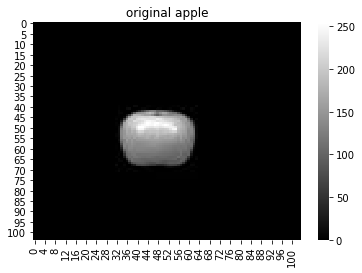

In [113]:
sns.heatmap(test_orig, cmap='gray')
plt.title('original apple')

# Lihui's percept images have problems

Namely time dimension (4 frames) and thick white margin.

In [73]:
test_sim = sio.imread('./sim/sub_Apfel.1_v1_new_percept.png')

In [74]:
np.shape(test_sim)
# Lihui's simulated "images" still have a time dimension and contain thick white margin area.

(288, 432, 4)

In [75]:
test_sim_first = test_sim[:,:,0]

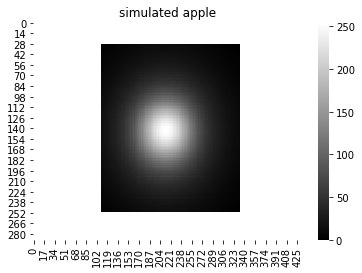

In [112]:
sns.heatmap(test_sim_first, cmap='gray')
plt.title('simulated apple')

## Correct for image size with numpy

In [81]:
# Margin pixels have value 225
test_sim_first[0,0]

255

In [110]:
# boolean mask for non-white pixels
immask = test_sim_first != 255
print(immask)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [95]:
# coordinates of white pixels
imcoords = np.argwhere(immask)

In [104]:
# create bounding box to crop
x0, y0 = imcoords.min(axis=0)
x1, y1 = imcoords.max(axis=0) + 1   # slices are exclusive at the top

In [105]:
cropped = test_sim_first[x0:x1, y0:y1]

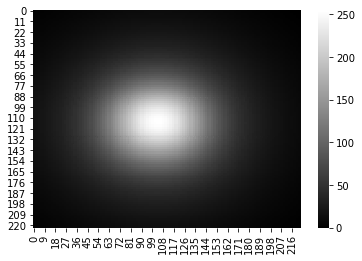

In [109]:
sns.heatmap(cropped, cmap='gray')

In [107]:
np.shape(cropped)

(223, 224)

In [123]:
# sio.imsave('cropped.png', cropped)

Trimming the white margin still gives us a wrong image size. The question is how this affects the HMAX representation. theoretically, the percept image should now have (paradoxically) a finer spatial resolution.

Possibly, we should downsample. Ask Lihui if she did that for her experiment.

In [132]:
# look at resized image
res = skresize(cropped, (104,104))

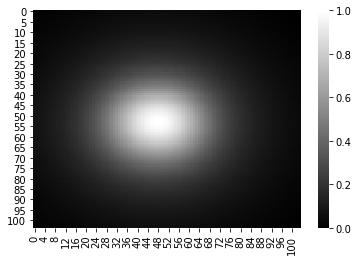

In [134]:
sns.heatmap(res, cmap='gray')

In [ ]:
# sio.imsave('resized.png', res)

## Carolas stimuli

In [125]:
carola_stim = sio.imread('/Users/Oliver/Documents/ovgu_promotion/experiment_carola/Experiment 3.1_sub/Programm_Phase 1/stim/Apfel.10_v1.png')

In [127]:
# Carolas stimuli have the same dimensions as the originals
np.shape(carola_stim)

(104, 104)

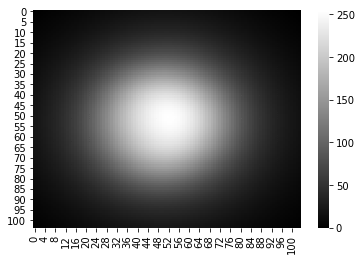

In [129]:
sns.heatmap(carola_stim, cmap='gray')